### KBO 신인 드래프트 테이블 생성

In [65]:
pitching_war_list[2].find("a").getText()


'윌커슨'

### KBO 신인 드래프트 CSV파일 읽기

In [53]:
draft_2021 = pd.read_csv('~/Downloads/2021_KBO_DRAFT.csv')
draft_2021.sort_values(by='ranking',ascending=True,inplace=True)
draft_2021.reset_index(inplace=True)
draft_2021.drop(["index"], axis=1,inplace=True)
draft_2021

,ranking,name,position,club,agency,year
0,1,김진욱,투수,롯데,강릉고,2021
1,2,김기중,투수,한화,유신고,2021
2,3,이재희,투수,삼성,대전고,2021
3,4,박건우,투수,KIA,고려대,2021
4,5,권동진,내야수,KT,원광대,2021
...,...,...,...,...,...,...
95,96,김진우,투수,NC,군산상업고,2021
96,97,박민호,포수,LG,경남대,2021
97,98,권혁찬,내야수,SK,홍익대,2021
98,99,장민호,투수,키움,배제고,2021


### table (신인_드레프트) 값 삽입

In [180]:
sql = ('''insert into 신인_드래프트 values(%s,%s,%s,%s,%s,%s)''')

for idx, row in draft_2021.iterrows():
    kbo_base.execute(sql, tuple(row))
    print(tuple(row))
remote.commit()

(1, '김진욱', '투수', '롯데', '강릉고', 2021)
(2, '김기중', '투수', '한화', '유신고', 2021)
(3, '이재희', '투수', '삼성', '대전고', 2021)
(4, '박건우', '투수', 'KIA', '고려대', 2021)
(5, '권동진', '내야수', 'KT', '원광대', 2021)
(6, '김주원', '내야수', 'NC', '유신고', 2021)
(7, '이영빈', '내야수', 'LG', '세광고', 2021)
(8, '조형우', '포수', 'SK', '광주제일고', 2021)
(9, '김휘집', '내야수', '키움', '신일고', 2021)
(10, '김동주', '투수', '두산', '선린인터넷고', 2021)
(11, '나승엽', '내야수', '롯데', '덕수고', 2021)
(12, '송호정', '내야수', '한화', '서울고', 2021)
(13, '홍무원', '투수', '삼성', '경기고', 2021)
(14, '장민기', '투수', 'KIA', '마산용마고', 2021)
(15, '한차현', '투수', 'KT', '성균관대', 2021)
(16, '이용준', '투수', 'NC', '서울디자인고', 2021)
(17, '김진수', '투수', 'LG', '중앙대', 2021)
(18, '고명준', '내야수', 'SK', '세광고', 2021)
(19, '김준형', '투수', '키움', '성남고', 2021)
(20, '최승용', '투수', '두산', '소래고', 2021)
(21, '김창훈', '투수', '롯데', '경남고', 2021)
(22, '조은', '투수', '한화', '대전고', 2021)
(23, '오헌석', '내야수', '삼성', '안산공업고', 2021)
(24, '이승재', '투수', 'KIA', '강릉영동대', 2021)
(25, '유준규', '내야수', 'KT', '군산상업고', 2021)
(26, '이장한', '외야수', 'NC', '장안고', 2021)
(27, '조건희', '투수', 

KeyboardInterrupt: 

In [219]:
sql = ('''select d.year, d.ranking, d.name, d.club, d.position, w.score, w.game, w.type
       from 신인_드래프트 d, WAR w
       where d.name = w.name and d.club = w.team and w.year = 2022
       group by d.name, d.club
       order by w.type asc, w.score desc''')
kbo_base.execute(sql)
result = kbo_base.fetchall()
for result_iterrow in result:
    print(result_iterrow)
df_draft2021 = pd.DataFrame(result)

(2021, 6, '김주원', 'NC', '내야수', 4.29, 96, '타격')
(2021, 83, '김현준', '삼성', '외야수', 2.53, 118, '타격')
(2021, 5, '권동진', 'KT', '내야수', 0.13, 48, '타격')
(2021, 7, '이영빈', 'LG', '내야수', 0.13, 60, '타격')
(2021, 89, '이재홍', '키움', '내야수', 0.1, 4, '타격')
(2021, 84, '김선우', 'KIA', '포수', 0.04, 3, '타격')
(2021, 9, '김휘집', '키움', '내야수', 0.03, 112, '타격')
(2021, 46, '오태양', 'NC', '내야수', 0.01, 15, '타격')
(2021, 34, '권혁경', 'KIA', '포수', -0.02, 2, '타격')
(2021, 43, '김동진', '삼성', '내야수', -0.07, 5, '타격')
(2021, 30, '강현구', '두산', '외야수', -0.09, 3, '타격')
(2021, 25, '유준규', 'KT', '내야수', -0.1, 7, '타격')
(2021, 39, '이주형', '키움', '외야수', -0.17, 32, '타격')
(2021, 49, '김시앙', '키움', '포수', -0.24, 13, '타격')
(2021, 20, '최승용', '두산', '투수', 0.92, 15, '투구')
(2021, 19, '김준형', '키움', '투수', 0.34, 0, '투구')
(2021, 1, '김진욱', '롯데', '투수', 0.31, 12, '투구')
(2021, 24, '이승재', 'KIA', '투수', 0.08, 0, '투구')
(2021, 36, '한재승', 'NC', '투수', 0.02, 0, '투구')
(2021, 35, '지명성', 'KT', '투수', 0.02, 0, '투구')
(2021, 21, '김창훈', '롯데', '투수', 0.01, 0, '투구')
(2021, 87, '송승기', 'LG', '투수', 

In [220]:
df_draft2021=df_draft2021.rename(columns={0 : '드래프트 연도', 1: '드래프트 순위', 2: '이름', 3:'구단', 4: '포지션', 5: 'WAR', 6: "게임 수",7: "WAR Type"})
df_draft2021.head()

,드래프트 연도,드래프트 순위,이름,구단,포지션,WAR,게임 수,WAR Type
0,2021,6,김주원,NC,내야수,4.29,96,타격
1,2021,83,김현준,삼성,외야수,2.53,118,타격
2,2021,5,권동진,KT,내야수,0.13,48,타격
3,2021,7,이영빈,LG,내야수,0.13,60,타격
4,2021,89,이재홍,키움,내야수,0.10,4,타격


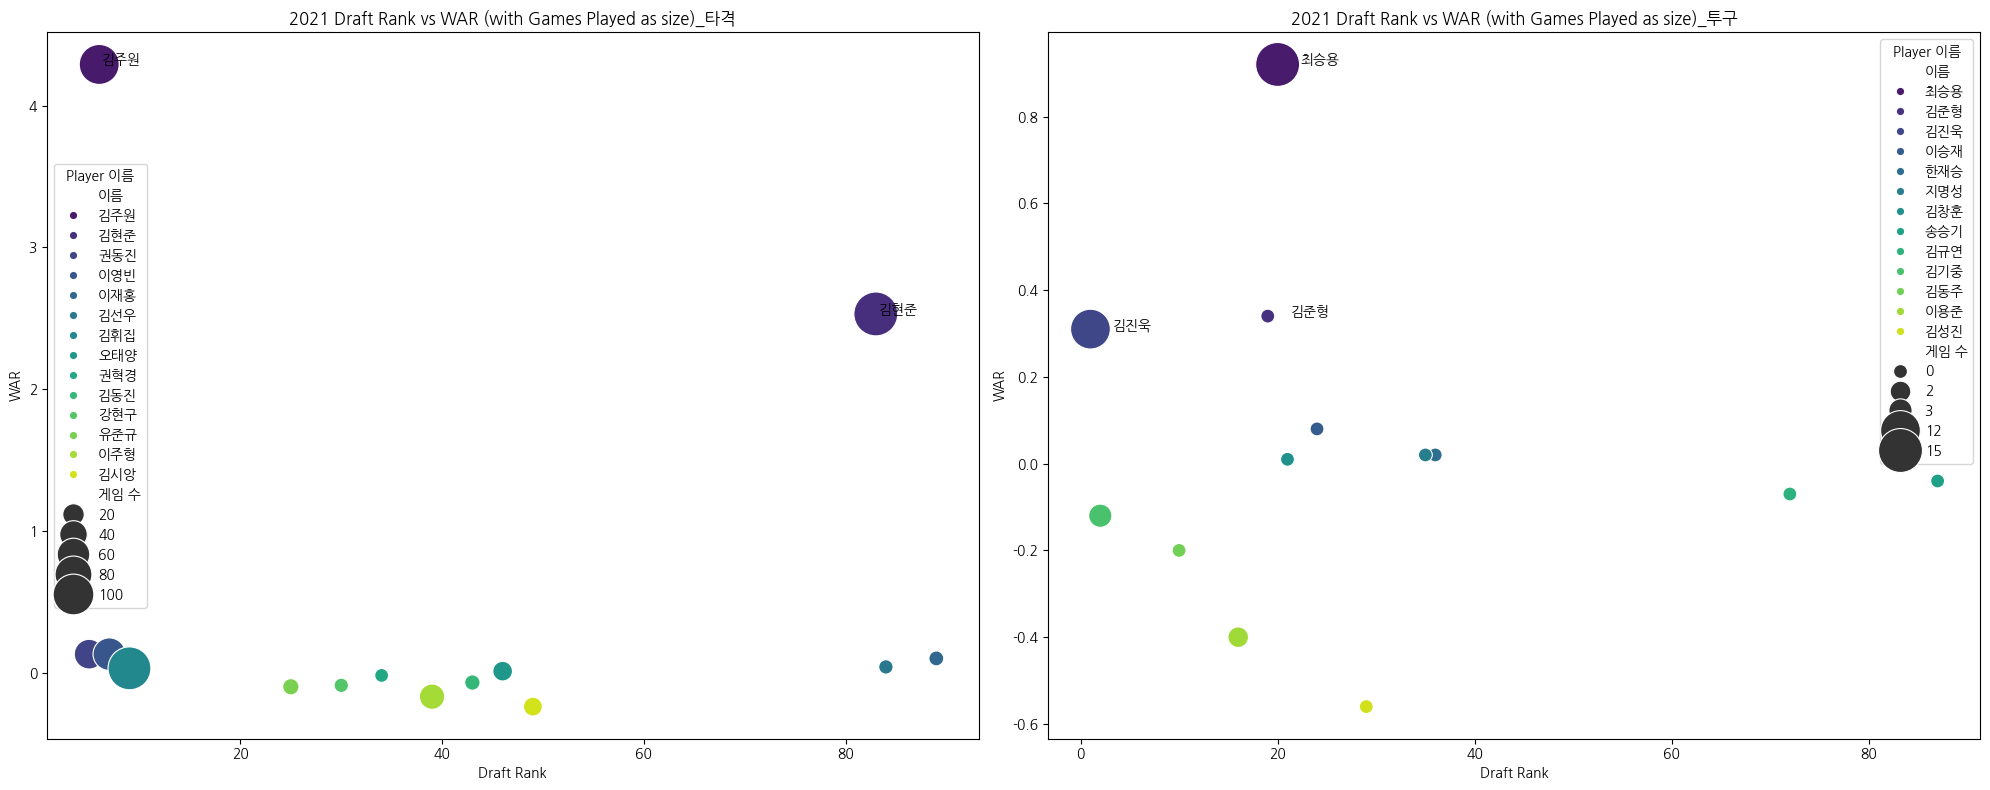

In [227]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import koreanize_matplotlib

df_draft2021_bet = df_draft2021[df_draft2021['WAR Type']=='타격']
df_draft2021_pitch = df_draft2021[df_draft2021['WAR Type']=='투구']

plt.figure(figsize=(20, 8))

# 타격 서브플롯
plt.subplot(1, 2, 1)
sns.scatterplot(x='드래프트 순위', y='WAR', size='게임 수', hue='이름', data=df_draft2021_bet, palette='viridis', sizes=(100, 1000))
plt.title('2021 Draft Rank vs WAR (with Games Played as size)_타격')
plt.xlabel('Draft Rank')
plt.ylabel('WAR')
plt.legend(title='Player 이름')

for i in range(len(df_draft2021_bet)):
    row = df_draft2021_bet.iloc[i]
    plt_name = row['이름']
    x = row['드래프트 순위']
    y = row['WAR']

    if y >= 1.5:
        plt.text(x+0.3, y, plt_name)

# 투구 서브플롯
plt.subplot(1, 2, 2)
sns.scatterplot(x='드래프트 순위', y='WAR', size='게임 수', hue='이름', data=df_draft2021_pitch, palette='viridis', sizes=(100, 1000))
plt.title('2021 Draft Rank vs WAR (with Games Played as size)_투구')
plt.xlabel('Draft Rank')
plt.ylabel('WAR')
plt.legend(title='Player 이름')

for i in range(len(df_draft2021_pitch)):
    row = df_draft2021_pitch.iloc[i]
    plt_name = row['이름']
    x = row['드래프트 순위']
    y = row['WAR']

    if y >= 0.3:
        plt.text(x+2.3, y, plt_name)

plt.tight_layout()
plt.show()

In [273]:
driver.close()

In [274]:
options = webdriver.ChromeOptions()

driver = webdriver.Chrome(service=Service("/home/jh/dev_ws/eda/driver/chromedriver"))
driver.get("https://www.koreabaseball.com/Record/Team/Pitcher/Basic1.aspx") #선수 기록실 - 주루 기록 2024

print('최대화')
driver.maximize_window()

최대화


In [290]:
page_source = driver.page_source
soup = BeautifulSoup(page_source, "html.parser")  
recode_team_bat_list1 =[]
for i in range(10):
    recode_team_bat_class = soup.find("tbody")
    recode_team_bat_list = recode_team_bat_class.find_all("tr")
    recode_team_bat_list1.append(recode_team_bat_list[i].getText().strip().split('\n'))

recode_team_bat_list1


[['1',
  'KIA',
  '4.42',
  '81',
  '46',
  '33',
  '28',
  '50',
  '0.582',
  '729',
  '780',
  '83',
  '317',
  '50',
  '622',
  '427',
  '358',
  '1.50'],
 ['2',
  '삼성',
  '4.43',
  '83',
  '44',
  '37',
  '26',
  '68',
  '0.543',
  '741 2/3',
  '768',
  '86',
  '301',
  '48',
  '573',
  '395',
  '365',
  '1.44'],
 ['3',
  'LG',
  '4.51',
  '84',
  '45',
  '37',
  '23',
  '42',
  '0.549',
  '743',
  '792',
  '71',
  '335',
  '50',
  '632',
  '418',
  '372',
  '1.52'],
 ['4',
  '두산',
  '4.54',
  '85',
  '44',
  '39',
  '25',
  '40',
  '0.530',
  '760',
  '797',
  '80',
  '332',
  '54',
  '610',
  '426',
  '383',
  '1.49'],
 ['5',
  'NC',
  '4.71',
  '81',
  '38',
  '41',
  '17',
  '42',
  '0.481',
  '724',
  '775',
  '71',
  '283',
  '36',
  '613',
  '422',
  '379',
  '1.46'],
 ['6',
  '롯데',
  '5.03',
  '78',
  '35',
  '40',
  '18',
  '31',
  '0.467',
  '690',
  '783',
  '72',
  '287',
  '44',
  '584',
  '414',
  '386',
  '1.55'],
 ['7',
  '키움',
  '5.06',
  '79',
  '34',
  '45',
  '1

In [289]:
page_source = driver.page_source
soup = BeautifulSoup(page_source, "html.parser")  
recode_team_bat_list2 = []
for i in range(10):
    recode_team_bat_class = soup.find("tbody")
    recode_team_bat_list = recode_team_bat_class.find_all("tr")
    recode_team_bat_list2.append(recode_team_bat_list[i].getText().strip().split('\n')[3:])

recode_team_bat_list2

[['81',
  '46',
  '33',
  '28',
  '50',
  '0.582',
  '729',
  '780',
  '83',
  '317',
  '50',
  '622',
  '427',
  '358',
  '1.50'],
 ['83',
  '44',
  '37',
  '26',
  '68',
  '0.543',
  '741 2/3',
  '768',
  '86',
  '301',
  '48',
  '573',
  '395',
  '365',
  '1.44'],
 ['84',
  '45',
  '37',
  '23',
  '42',
  '0.549',
  '743',
  '792',
  '71',
  '335',
  '50',
  '632',
  '418',
  '372',
  '1.52'],
 ['85',
  '44',
  '39',
  '25',
  '40',
  '0.530',
  '760',
  '797',
  '80',
  '332',
  '54',
  '610',
  '426',
  '383',
  '1.49'],
 ['81',
  '38',
  '41',
  '17',
  '42',
  '0.481',
  '724',
  '775',
  '71',
  '283',
  '36',
  '613',
  '422',
  '379',
  '1.46'],
 ['78',
  '35',
  '40',
  '18',
  '31',
  '0.467',
  '690',
  '783',
  '72',
  '287',
  '44',
  '584',
  '414',
  '386',
  '1.55'],
 ['79',
  '34',
  '45',
  '14',
  '35',
  '0.430',
  '697 1/3',
  '769',
  '71',
  '292',
  '48',
  '498',
  '432',
  '392',
  '1.52'],
 ['80',
  '35',
  '43',
  '13',
  '25',
  '0.449',
  '708',
  '797',

In [291]:
recode_team_bat_list = recode_team_bat_list1 + recode_team_bat_list2
recode_team_bat_list

[['1',
  'KIA',
  '4.42',
  '81',
  '46',
  '33',
  '28',
  '50',
  '0.582',
  '729',
  '780',
  '83',
  '317',
  '50',
  '622',
  '427',
  '358',
  '1.50'],
 ['2',
  '삼성',
  '4.43',
  '83',
  '44',
  '37',
  '26',
  '68',
  '0.543',
  '741 2/3',
  '768',
  '86',
  '301',
  '48',
  '573',
  '395',
  '365',
  '1.44'],
 ['3',
  'LG',
  '4.51',
  '84',
  '45',
  '37',
  '23',
  '42',
  '0.549',
  '743',
  '792',
  '71',
  '335',
  '50',
  '632',
  '418',
  '372',
  '1.52'],
 ['4',
  '두산',
  '4.54',
  '85',
  '44',
  '39',
  '25',
  '40',
  '0.530',
  '760',
  '797',
  '80',
  '332',
  '54',
  '610',
  '426',
  '383',
  '1.49'],
 ['5',
  'NC',
  '4.71',
  '81',
  '38',
  '41',
  '17',
  '42',
  '0.481',
  '724',
  '775',
  '71',
  '283',
  '36',
  '613',
  '422',
  '379',
  '1.46'],
 ['6',
  '롯데',
  '5.03',
  '78',
  '35',
  '40',
  '18',
  '31',
  '0.467',
  '690',
  '783',
  '72',
  '287',
  '44',
  '584',
  '414',
  '386',
  '1.55'],
 ['7',
  '키움',
  '5.06',
  '79',
  '34',
  '45',
  '1